In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import seaborn as sns
from sklearn.metrics import roc_auc_score

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
vaccine_df_test = pd.read_csv(os.path.join('test_set_features.csv'), delimiter=',')
vaccine_df_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
vaccine_df_test.shape

(26708, 36)

In [4]:
vaccine_df_test.isna().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [5]:
vaccine_df_test.isna().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [6]:
def impute_health_ins(cols):
    health=cols[0]
    if pd.isna(health):
        return 1
    else:
        return health
    

vaccine_df_test['health_insurance'] = vaccine_df_test[['health_insurance']].apply(impute_health_ins,axis=1)

In [7]:
vaccine_df_test['age_group'].unique()

array(['35 - 44 Years', '18 - 34 Years', '55 - 64 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

vaccine_df_test['age_group'] = label_encoder.fit_transform(vaccine_df_test['age_group'])
vaccine_df_test['employment_status'] = label_encoder.fit_transform(vaccine_df_test['employment_status'])

In [10]:
vaccine_df_test['age_group'].unique()

array([1, 0, 3, 4, 2])

In [11]:
def impute_emp_stat(cols):
    emp=cols[0]
    age=cols[1]
    if pd.isna(emp):
        if age==0:
            return 1
        else:
            return 0
    else:
        return age
    

vaccine_df_test['employment_status'] = vaccine_df_test[['employment_status','age_group']].apply(impute_emp_stat,axis=1)

In [12]:
vaccine_df_test.drop(['employment_occupation','employment_industry'], axis=1,inplace=True)

<AxesSubplot:>

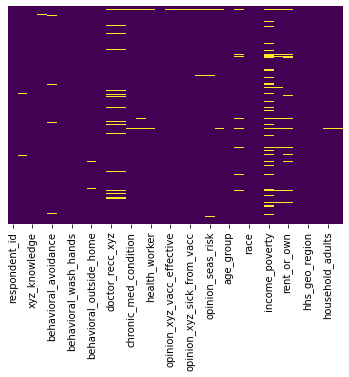

In [13]:
sns.heatmap(vaccine_df_test.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
vaccine_df_test['xyz_concern'] = vaccine_df_test['xyz_concern'].fillna(vaccine_df_test['xyz_concern'].mode()[0])
vaccine_df_test['xyz_knowledge'] = vaccine_df_test['xyz_knowledge'].fillna(vaccine_df_test['xyz_knowledge'].mode()[0])
vaccine_df_test['behavioral_antiviral_meds'] = vaccine_df_test['behavioral_antiviral_meds'].fillna(vaccine_df_test['behavioral_antiviral_meds'].mode()[0])
vaccine_df_test['behavioral_avoidance'] = vaccine_df_test['behavioral_avoidance'].fillna(vaccine_df_test['behavioral_avoidance'].mode()[0])
vaccine_df_test['behavioral_face_mask'] = vaccine_df_test['behavioral_face_mask'].fillna(vaccine_df_test['behavioral_face_mask'].mode()[0])
vaccine_df_test['behavioral_wash_hands'] = vaccine_df_test['behavioral_wash_hands'].fillna(vaccine_df_test['behavioral_wash_hands'].mode()[0])
vaccine_df_test['behavioral_large_gatherings'] = vaccine_df_test['behavioral_large_gatherings'].fillna(vaccine_df_test['behavioral_large_gatherings'].mode()[0])
vaccine_df_test['behavioral_outside_home'] = vaccine_df_test['behavioral_outside_home'].fillna(vaccine_df_test['behavioral_outside_home'].mode()[0])
vaccine_df_test['behavioral_touch_face'] = vaccine_df_test['behavioral_touch_face'].fillna(vaccine_df_test['behavioral_touch_face'].mode()[0])
vaccine_df_test['doctor_recc_xyz'] = vaccine_df_test['doctor_recc_xyz'].fillna(vaccine_df_test['doctor_recc_xyz'].mode()[0])
vaccine_df_test['doctor_recc_seasonal'] = vaccine_df_test['doctor_recc_seasonal'].fillna(vaccine_df_test['doctor_recc_seasonal'].mode()[0])
vaccine_df_test['chronic_med_condition'] = vaccine_df_test['chronic_med_condition'].fillna(vaccine_df_test['chronic_med_condition'].mode()[0])
vaccine_df_test['child_under_6_months'] = vaccine_df_test['child_under_6_months'].fillna(vaccine_df_test['child_under_6_months'].mode()[0])
vaccine_df_test['health_worker'] = vaccine_df_test['health_worker'].fillna(vaccine_df_test['health_worker'].mode()[0])
vaccine_df_test['opinion_xyz_vacc_effective'] = vaccine_df_test['opinion_xyz_vacc_effective'].fillna(vaccine_df_test['opinion_xyz_vacc_effective'].mode()[0])
vaccine_df_test['opinion_xyz_risk'] = vaccine_df_test['opinion_xyz_risk'].fillna(vaccine_df_test['opinion_xyz_risk'].mode()[0])
vaccine_df_test['opinion_xyz_sick_from_vacc'] = vaccine_df_test['opinion_xyz_sick_from_vacc'].fillna(vaccine_df_test['opinion_xyz_sick_from_vacc'].mode()[0])
vaccine_df_test['opinion_seas_vacc_effective'] = vaccine_df_test['opinion_seas_vacc_effective'].fillna(vaccine_df_test['opinion_seas_vacc_effective'].mode()[0])
vaccine_df_test['opinion_seas_risk'] = vaccine_df_test['opinion_seas_risk'].fillna(vaccine_df_test['opinion_seas_risk'].mode()[0])
vaccine_df_test['opinion_seas_sick_from_vacc'] = vaccine_df_test['opinion_seas_sick_from_vacc'].fillna(vaccine_df_test['opinion_seas_sick_from_vacc'].mode()[0])
vaccine_df_test['education'] = vaccine_df_test['education'].fillna(vaccine_df_test['education'].mode()[0])
vaccine_df_test['income_poverty'] = vaccine_df_test['income_poverty'].fillna(vaccine_df_test['income_poverty'].mode()[0])
vaccine_df_test['marital_status'] = vaccine_df_test['marital_status'].fillna(vaccine_df_test['marital_status'].mode()[0])
vaccine_df_test['rent_or_own'] = vaccine_df_test['rent_or_own'].fillna(vaccine_df_test['rent_or_own'].mode()[0])
vaccine_df_test['household_adults'] = vaccine_df_test['household_adults'].fillna(vaccine_df_test['household_adults'].mode()[0])
vaccine_df_test['household_children'] = vaccine_df_test['household_children'].fillna(vaccine_df_test['household_children'].mode()[0])


<AxesSubplot:>

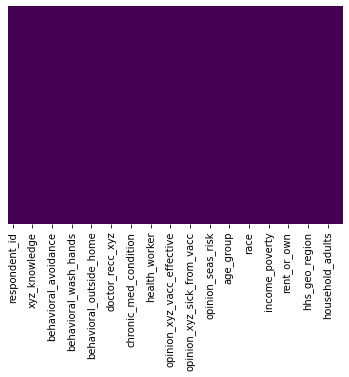

In [15]:
sns.heatmap(vaccine_df_test.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
vaccine_df_test['education'] = label_encoder.fit_transform(vaccine_df_test['education'])
vaccine_df_test['race'] = label_encoder.fit_transform(vaccine_df_test['race'])
vaccine_df_test['sex'] = label_encoder.fit_transform(vaccine_df_test['sex'])
vaccine_df_test['income_poverty'] = label_encoder.fit_transform(vaccine_df_test['income_poverty'])
vaccine_df_test['marital_status'] = label_encoder.fit_transform(vaccine_df_test['marital_status'])
vaccine_df_test['rent_or_own'] = label_encoder.fit_transform(vaccine_df_test['rent_or_own'])
vaccine_df_test['hhs_geo_region'] = label_encoder.fit_transform(vaccine_df_test['hhs_geo_region'])
vaccine_df_test['census_msa'] = label_encoder.fit_transform(vaccine_df_test['census_msa'])


In [17]:
vaccine_df_test.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int32
education                        int32
race                             int32
sex                      

In [18]:
vaccine_df_test.set_index(['respondent_id'])

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,0,1,1,1,1,7,0,1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,2,1,1,0,1,2,3.0,0.0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3,1,1,0,0,3,5,2,1.0,0.0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,0,0,0,0,4,5,0,1.0,0.0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,1,6,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,0,0,0,1,2,1,1.0,1.0
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,3,1,2,0,1,0,9,2,1.0,3.0
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,2,1,1,0,9,0,1.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
vaccine_df__test_scaled=scaler.fit_transform(vaccine_df_test)

In [20]:
vaccine_df = pd.read_csv(os.path.join('clean_test_data.csv'), delimiter=',')
vaccine_df.head()
vaccine_df.columns

Index(['Unnamed: 0', 'respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [21]:
vaccine_df.drop(['Unnamed: 0'], axis=1,inplace=True)
vaccine_df.set_index(['respondent_id'])


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,3,8,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,1,1,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,9,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,4,5,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,2,9,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,0,1,0,4,9,2,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,0,1,1,0,6,1,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,1,0,3,6,0,0.0,0.0


In [22]:
vaccine_df.isna().sum().sum()

0

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
vaccine_df_scaled=scaler.fit_transform(vaccine_df)

In [24]:
target_df = pd.read_csv(os.path.join('training_set_labels.csv'), delimiter=',')
target_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [44]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test =train_test_split(vaccine_df_scaled,target_df['xyz_vaccine'],test_size=.20, train_size=.80, random_state=15, shuffle=True, stratify=None)

In [45]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test =train_test_split(vaccine_df_scaled,target_df['seasonal_vaccine'],test_size=.20, train_size=.80, random_state=15, shuffle=True, stratify=None)

In [46]:
from sklearn import ensemble
model1 = ensemble.AdaBoostClassifier()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])


0.8370065472721842

In [47]:
from sklearn import ensemble
model2 = ensemble.AdaBoostClassifier()
model2.fit(X2_train,y2_train)
predicted2 = model2.predict(X2_test)
model2.predict_proba(X2_test)[:, 1]
roc_auc_score(y2_test, model2.predict_proba(X2_test)[:, 1])


0.857774609958084

In [54]:
from sklearn import svm
model1 = svm.SVC(kernel='rbf',random_state=15)
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
#model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.decision_function(X1_test),average=None)

0.807680435569912

In [56]:
from sklearn import svm
model2 = svm.SVC(kernel='rbf',random_state=15)
model2.fit(X2_train,y2_train)
predicted2 = model2.predict(X2_test)
#model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y2_test, model2.decision_function(X2_test),average=None)

0.8545881850862869

In [59]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)
model1.predict_proba(X1_test)[:, 1]
roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])

0.8012351567972492

In [60]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X2_train,y2_train)
predicted2 = model2.predict(X1_test)
model2.predict_proba(X2_test)[:, 1]
roc_auc_score(y2_test, model2.predict_proba(X2_test)[:, 1])

0.8051167109168835

In [61]:
from sklearn import linear_model
model1 = linear_model.LogisticRegression()
model1.fit(X1_train,y1_train)
predicted1 = model1.predict(X1_test)

roc_auc_score(y1_test, model1.predict_proba(X1_test)[:, 1])

0.8354089614479415

In [62]:
from sklearn import linear_model
model2 = linear_model.LogisticRegression()
model2.fit(X2_train,y2_train)
predicted2 = model2.predict(X2_test)

roc_auc_score(y2_test, model2.predict_proba(X2_test)[:, 1])

0.8534279840600432

In [64]:
final_df=pd.DataFrame()
final_df["respondent_id"]=vaccine_df_test["respondent_id"]
final_df["xyz_vaccine"] = model1.predict_proba(vaccine_df__test_scaled)[:, 1]
final_df["seasonal_vaccine"]=model2.predict_proba(vaccine_df__test_scaled)[:, 1]
final_df.set_index(["respondent_id"])

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.075871,0.214923
26708,0.046500,0.036139
26709,0.447269,0.728194
26710,0.465636,0.878978
26711,0.226968,0.529484
...,...,...
53410,0.339456,0.516733
53411,0.091293,0.209176
53412,0.142257,0.206189


In [95]:
final_df.to_csv('Submission_Hackathon.csv',header=True, index=False)